
Acurácia final do melhor modelo: 0.133
Número de clusters formados: 9


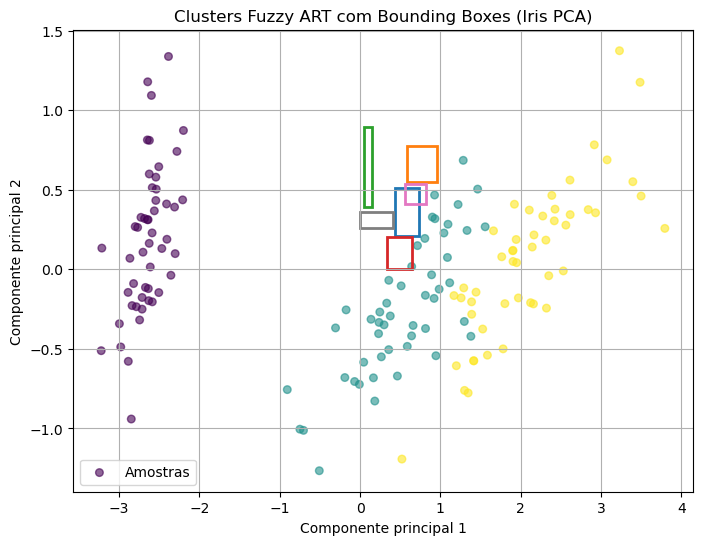

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from artlib import FuzzyART
import numpy as np

# 1. Carregar a base de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Reduz para 2 dimensões só pra visualização
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.3, random_state=42)

# 2. Instanciar o melhor modelo (substitua best_result pelos valores reais)
best_model = FuzzyART(rho=0.7, alpha = 0.0, beta=1.0)

# 3. Definir limites e preparar dados
lower_bound, upper_bound = best_model.find_data_bounds(X_2d)
best_model.set_data_bounds(lower_bound, upper_bound)
train_X_prep = best_model.prepare_data(X_train)
test_X_prep = best_model.prepare_data(X_test)

# 4. Treinar e prever
best_model.fit(train_X_prep, y_train)
predictions = best_model.predict(test_X_prep)

# 5. Avaliar o modelo
final_acc = accuracy_score(y_test, predictions)
print(f"\nAcurácia final do melhor modelo: {final_acc:.3f}")
print(f"Número de clusters formados: {len(best_model.W)}")

# 6. Plotar os clusters e suas bounding boxes
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Cores dos clusters
colors = plt.cm.tab10(np.linspace(0, 1, len(best_model.W)))

# Pontos originais
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', s=30, alpha=0.6, label="Amostras")

# Adicionar bounding boxes de cada cluster
best_model.plot_cluster_bounds(ax=ax, colors=colors, linewidth=2)

plt.title("Clusters Fuzzy ART com Bounding Boxes (Iris PCA)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()
